# Explore

## Contents

- [Updates](#Updates)
- [Wrangle](#Wrangle)
- [Target](#Target)
- [Quant_cols](#Quant_cols)
- [Recoder](#Recoder)
- [Countplot](#Countplot)
- [Tricols](#Tricols)
- [Chi2](#Chi2)

## Updates
[*Back to top*](#Contents)

In [56]:
# Python updates

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import itertools as it
import re

In [2]:
# Local updates

import sys
sys.path.append('')
import wrangle

In [3]:
 # Jupyter notebooks only #
def ifull(obj):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(obj)

## Wrangle
[*Back to top*](#Contents)

In [4]:
df, dictdf = wrangle.wrangle_data()
print(df.shape)
display(df.head(5))
ifull(df.describe().T)

(726, 87)


,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_workshop,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,3,2,0,3,3,3,3,...,2,3,2,2,2,NaN,research-practice connections,NaN,research-practice connections,2
288,Academic,4,1.0,1,2,1,3,3,3,3,...,3,3,1,1,2,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2
294,Academic,4,1.0,3,3,1,3,1,3,3,...,2,2,2,2,2,NaN,NaN,NaN,Looking forward! \n,2
281,Academic,4,1.0,3,4,0,2,3,2,0,...,3,2,2,3,2,NaN,"Research design, innovative methods, communica...",NaN,NaN,2
280,Academic,4,1.0,3,3,0,1,1,3,2,...,3,2,1,2,2,You should consider the combination of confere...,NaN,NaN,NaN,2


,count,mean,std,min,25%,50%,75%,max
job_conduct_res,726.0,2.856749,1.025941,0.0,3.0,3.0,4.0,4.0
job_analyze_res,726.0,2.913223,0.939210,0.0,3.0,3.0,3.0,4.0
job_buy_res_report,726.0,0.402204,0.720686,0.0,0.0,0.0,1.0,4.0
job_manage_res_proj,726.0,2.600551,1.166285,0.0,2.0,3.0,3.0,4.0
job_observe_res,726.0,1.982094,1.134273,0.0,1.0,2.0,3.0,4.0
job_plan_res,726.0,2.931129,0.950177,0.0,3.0,3.0,4.0,4.0
job_teach_res,726.0,1.845730,1.236637,0.0,1.0,2.0,3.0,4.0
job_advocate_res,726.0,2.924242,1.056235,0.0,3.0,3.0,4.0,4.0
job_hire_res_vendor,726.0,0.776860,0.914143,0.0,0.0,1.0,1.0,4.0
job_lead_res_team,726.0,1.860882,1.486931,0.0,0.0,2.0,3.0,4.0


## Target
[*Back to top*](#Contents)

In [5]:
learning_conference_int = np.array(df['learning_conference'] >1).astype('int32')
likely_conference_int = np.array(df['likely_conference']>1).astype('int32')
df['target'] = (learning_conference_int + likely_conference_int) / 2

In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 284 to 2
Data columns (total 88 columns):
job_title                    726 non-null category
job_taxo                     726 non-null category
job_id                       723 non-null category
job_conduct_res              726 non-null int64
job_analyze_res              726 non-null int64
job_buy_res_report           726 non-null int64
job_manage_res_proj          726 non-null int64
job_observe_res              726 non-null int64
job_plan_res                 726 non-null int64
job_teach_res                726 non-null int64
job_advocate_res             726 non-null int64
job_hire_res_vendor          726 non-null int64
job_lead_res_team            726 non-null int64
num_employees                723 non-null category
company_small                726 non-null int64
company_med                  726 non-null int64
company_large                726 non-null int64
num_researchers              722 non-null category
num_res_small   

None

In [7]:
print(dictdf.shape)
display(dictdf)
ifull(dictdf.describe().T)

(89, 11)


,column_name,is_required,from_orig_file,in_wrangle,char_type,function,data_type,encoder,survey_section,question_group,question_text
qid,,,,,,,,,,,
q00,resp_id,True,True,True,numeric,identification,int64,NaN,Survey,ID,Entry Id
q01a,job_title,True,True,True,text,categorical,category,NaN,Work,Position,Title
q01b,job_taxo,True,True,True,numeric,categorical,category,NaN,Work,Position,Job Taxo ID
q01c,job_id,False,True,True,numeric,categorical,category,NaN,Work,Position,Job ID
q02a,job_conduct_res,True,True,True,numeric,quantitative,int64,often5,Work,Research Duties,Conducting Research
...,...,...,...,...,...,...,...,...,...,...,...
q20,other_conference_types,False,True,True,text,qualitative,object,NaN,Conference 2,Sessions of Interest,Did we miss any other types of conference sess...
q21,ideal_topics,False,True,True,text,qualitative,object,NaN,Conference 2,Desired Topics,"If attending a conference about research, what..."
q22,ideal_attendees,False,True,True,text,qualitative,object,NaN,Conference 2,Desired Attendees,"If attending a conference about research, who ..."


,count,unique,top,freq
column_name,89,89,ideal_conference_size,1
is_required,89,2,True,61
from_orig_file,89,2,True,72
in_wrangle,89,2,True,88
char_type,89,3,numeric,74
function,89,5,quantitative,51
data_type,89,3,int64,66
encoder,69,11,important5,18
survey_section,88,8,Conference 2,24
question_group,88,24,Conference Factors,10


In [8]:
df.research_educ_cat.value_counts()

1    546
0    180
Name: research_educ_cat, dtype: int64

In [9]:
df.research_educ_cat.astype('bool').value_counts()

True     546
False    180
Name: research_educ_cat, dtype: int64

## Recoder
[*Back to top*](#Contents)

In [10]:
recoder_dictionaries = {
    2: {
        "important5": 'r5to2',
        "likely5": 'r5to2',
        "often4": 'r4to2',
        "often5": 'r5to2',
        "tenure6": 'r6to2',
    },
    3: {
        "important5": 'r5to3',
        "likely5": 'r5to3',
        "often4": 'r4to2',
        "often5": 'r5to3',
        "tenure6": 'r6to3',            
    },
}

In [11]:
recoder = {
    'r2to2': {
        0: 0,
        1: 1,
    },
    'r4to2': {
        0: 0,
        1: 0,
        2: 1,
        3: 1,
    },
    'r5to2': {
        0: 0,
        1: 0,
        2: 1,
        3: 1,
        4: 1,
    },
    'r5to3': {
        0: 0,
        1: 0,
        2: .5,
        3: 1,
        4: 1,
    },
    'r6to2': {
        0: 0,
        1: 0,
        2: 0,
        3: 1,
        4: 1,
        5: 1,
    },
    'r6to3': {
        0: 0,
        1: 0,
        2: .5,
        3: .5,
        4: 1,
        5: 1,
    },
}

In [12]:
# Get mapping dictionary
def get_recoder_dictionary(data_dictionary, recoder_dictionaries):
    '''
    get_recoder_dictionary(data_dictionary, recoder_dictionaries=recoder_dictionaries)

    Use this function to identify which data dictionary will be used for each 
    field when recoding. One column for each target number of fields.
    
    Activate as follows:
        check_recoder = get_recoder_dictionary(dictdf, recoder_dictionaries)
    

    Returns recoder dictionary dataframe
    '''
    recode_df = data_dictionary[['column_name','encoder']].copy().dropna()
    recode_df['col'] = recode_df.column_name
    recode_df=recode_df.set_index('column_name')
    levels = [level for level in recoder_dictionaries]
    for chk in range(len(levels)):
        level = levels[chk]
        recoder_dictionary = recoder_dictionaries[level]
        recodes = [recode for recode in recoder_dictionary]
        tempdf = recode_df[recode_df.encoder.isin(recodes)].copy()
        tempdf[level] = tempdf.encoder.apply(lambda x: recoder_dictionary[x])
        recode_df = recode_df.join(tempdf[[level]], how='left')
    recode_df = recode_df.dropna(subset=[levels[0]])
    return recode_df



In [13]:
def recode_columns(df, recode_df, recoder, outputs):
    '''
    recode_columns(df, recode_df, recoder=recoder, outputs=2)

    *** MUST HAVE RECODER DICTIONARY FILE BEFORE STARTING ***
    Use this function to make a recoded dataframe. All recode columns will be updated with the new values, other columns will remain as-is.
    Activate as follows:
        dfrecode2 = recode_columns(df, check_recoder, recoder, outputs=2)

    Returns recode dataframe
    '''
    use_df = df.copy()
    allcols=recode_df.col
    check_dicts=recode_df[outputs]
    cols=[chkcol for chkcol in allcols if chkcol in use_df.columns]
    for col in cols:
        use_dict = recoder[check_dicts[col]]
        encoded = use_df[col].apply(lambda x: use_dict[x])
        use_df[col] = encoded
    return use_df



In [14]:
def make_recode_df(
    df, data_dictionary, outputs=2, 
    recoder_dictionaries=recoder_dictionaries, recoder=recoder
    ):
    '''
    make_recode_df(
        df, data_dictionary, outputs=2, 
        recoder_dictionaries=recoder_dictionaries, recoder=recoder
    )

    Function takes wrangle data and dataframe and creates a new dataframe with
    the quantitative values recoded based on the number of outputs
    '''
    check_recoder = get_recoder_dictionary(
        data_dictionary=data_dictionary, 
        recoder_dictionaries=recoder_dictionaries
    )
    dfrecode = recode_columns(
        df=df, recode_df=check_recoder, recoder=recoder, outputs=outputs
    )
    
    return dfrecode


In [15]:
check_recode2 = make_recode_df(df, dictdf)
check_recode2

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id,target
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,1,1,0,1,1,1,1,...,1,1,1,1,NaN,research-practice connections,NaN,research-practice connections,2,1.0
288,Academic,4,1.0,0,1,0,1,1,1,1,...,1,0,0,1,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2,1.0
294,Academic,4,1.0,1,1,0,1,0,1,1,...,1,1,1,1,NaN,NaN,NaN,Looking forward! \n,2,1.0
281,Academic,4,1.0,1,1,0,1,1,1,0,...,1,1,1,1,NaN,"Research design, innovative methods, communica...",NaN,NaN,2,1.0
280,Academic,4,1.0,1,1,0,0,0,1,1,...,1,0,1,1,You should consider the combination of confere...,NaN,NaN,NaN,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,UX Researcher,1,28.0,1,1,0,0,1,0,1,...,1,1,1,1,none,collaboration with teams,"big and small companies, seeing the scale at w...",provide tools and resources and support for ne...,5,0.0
879,UX Researcher,1,28.0,1,1,0,1,0,1,0,...,1,1,0,0,NaN,"A research team of 1, How to deal with a lot o...",NaN,Make it affordable. Somewhere in Europe. :),4,0.5
136,UX Researcher,1,28.0,1,1,0,1,1,1,1,...,0,0,0,1,"masterclasses, full day talks/trainings - whi...",how to tackle typical research problems (e.g p...,"personal friends, a variety of people - not ju...","My goal is to provide constructive criticism, ...",4,0.0


In [16]:
check_recoder = get_recoder_dictionary(dictdf, recoder_dictionaries)
check_recoder

,encoder,col,2,3
column_name,,,,
job_conduct_res,often5,job_conduct_res,r5to2,r5to3
job_analyze_res,often5,job_analyze_res,r5to2,r5to3
job_buy_res_report,often5,job_buy_res_report,r5to2,r5to3
job_manage_res_proj,often5,job_manage_res_proj,r5to2,r5to3
job_observe_res,often5,job_observe_res,r5to2,r5to3
job_plan_res,often5,job_plan_res,r5to2,r5to3
job_teach_res,often5,job_teach_res,r5to2,r5to3
job_advocate_res,often5,job_advocate_res,r5to2,r5to3
job_hire_res_vendor,often5,job_hire_res_vendor,r5to2,r5to3


In [17]:
dfrecode3 = recode_columns(df, check_recoder, recoder, outputs=3)
display(dfrecode3.head())
ifull(dfrecode3.describe().T)

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id,target
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,...,1.0,0.5,0.5,0.5,NaN,research-practice connections,NaN,research-practice connections,2,1.0
288,Academic,4,1.0,0.0,0.5,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.5,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2,1.0
294,Academic,4,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.5,0.5,0.5,0.5,NaN,NaN,NaN,Looking forward! \n,2,1.0
281,Academic,4,1.0,1.0,1.0,0.0,0.5,1.0,0.5,0.0,...,0.5,0.5,1.0,0.5,NaN,"Research design, innovative methods, communica...",NaN,NaN,2,1.0
280,Academic,4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,...,0.5,0.0,0.5,0.5,You should consider the combination of confere...,NaN,NaN,NaN,2,1.0


,count,mean,std,min,25%,50%,75%,max
job_conduct_res,726.0,0.811295,0.372591,0.0,1.0,1.0,1.0,1.0
job_analyze_res,726.0,0.840220,0.343342,0.0,1.0,1.0,1.0,1.0
job_buy_res_report,726.0,0.045455,0.180038,0.0,0.0,0.0,0.0,1.0
job_manage_res_proj,726.0,0.715565,0.416908,0.0,0.5,1.0,1.0,1.0
job_observe_res,726.0,0.488292,0.455844,0.0,0.0,0.5,1.0,1.0
job_plan_res,726.0,0.835399,0.340548,0.0,1.0,1.0,1.0,1.0
job_teach_res,726.0,0.457300,0.463385,0.0,0.0,0.5,1.0,1.0
job_advocate_res,726.0,0.811983,0.352500,0.0,1.0,1.0,1.0,1.0
job_hire_res_vendor,726.0,0.111570,0.294695,0.0,0.0,0.0,0.0,1.0
job_lead_res_team,726.0,0.460744,0.463318,0.0,0.0,0.5,1.0,1.0


In [18]:
dfrecode2 = recode_columns(df, check_recoder, recoder, outputs=2)
display(dfrecode2.head())
display(dfrecode2.describe().T)

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id,target
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,1,1,0,1,1,1,1,...,1,1,1,1,NaN,research-practice connections,NaN,research-practice connections,2,1.0
288,Academic,4,1.0,0,1,0,1,1,1,1,...,1,0,0,1,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2,1.0
294,Academic,4,1.0,1,1,0,1,0,1,1,...,1,1,1,1,NaN,NaN,NaN,Looking forward! \n,2,1.0
281,Academic,4,1.0,1,1,0,1,1,1,0,...,1,1,1,1,NaN,"Research design, innovative methods, communica...",NaN,NaN,2,1.0
280,Academic,4,1.0,1,1,0,0,0,1,1,...,1,0,1,1,You should consider the combination of confere...,NaN,NaN,NaN,2,1.0


,count,mean,std,min,25%,50%,75%,max
job_conduct_res,726.0,0.840220,0.366654,0.0,1.0,1.0,1.0,1.0
job_analyze_res,726.0,0.873278,0.332890,0.0,1.0,1.0,1.0,1.0
job_buy_res_report,726.0,0.067493,0.251047,0.0,0.0,0.0,0.0,1.0
job_manage_res_proj,726.0,0.775482,0.417552,0.0,1.0,1.0,1.0,1.0
job_observe_res,726.0,0.573003,0.494983,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
session_network,726.0,0.676309,0.468206,0.0,0.0,1.0,1.0,1.0
session_social_event,726.0,0.464187,0.499060,0.0,0.0,0.0,1.0,1.0
session_qa,726.0,0.691460,0.462209,0.0,0.0,1.0,1.0,1.0
sesson_topic_tables,726.0,0.768595,0.422021,0.0,1.0,1.0,1.0,1.0


## Ctgy_cols
[*Back to top*](#Contents)

In [19]:
ctgy_cols = df.select_dtypes(['category']).columns
print(type(ctgy_cols))
ctgy_cols.to_list()

<class 'pandas.core.indexes.base.Index'>


['job_title',
 'job_taxo',
 'job_id',
 'num_employees',
 'num_researchers',
 'primary_industry',
 'ideal_conference_size_cat',
 'ideal_structure_cat',
 'persona_id']

## Quant_cols
[*Back to top*](#Contents)

In [20]:
#Quantitative columns
quant_cols = df.select_dtypes([int,float,bool]).columns
quant_cols.to_list()

['job_conduct_res',
 'job_analyze_res',
 'job_buy_res_report',
 'job_manage_res_proj',
 'job_observe_res',
 'job_plan_res',
 'job_teach_res',
 'job_advocate_res',
 'job_hire_res_vendor',
 'job_lead_res_team',
 'company_small',
 'company_med',
 'company_large',
 'num_res_small',
 'num_res_med',
 'num_res_large',
 'exp_conduct_res',
 'exp_analyze_res',
 'exp_buy_res_report',
 'exp_manage_res_proj',
 'exp_observe_res',
 'exp_plan_res',
 'exp_teach_res',
 'exp_advocate_res',
 'exp_hire_res_vendor',
 'exp_lead_res_team',
 'research_educ_cat',
 'learning_talks',
 'learning_read',
 'learning_meetup',
 'learning_workshop',
 'learning_conference',
 'likely_watch_video',
 'likely_internet',
 'likely_book',
 'likely_online_group',
 'likely_colleague',
 'likely_meetup',
 'likely_conference',
 'likely_workshop',
 'factor_speaker',
 'factor_diverse_speak',
 'factor_topics',
 'factor_format_sessions',
 'factor_size',
 'factor_network',
 'factor_variety_attend',
 'factor_code',
 'factor_location',
 'f

## Excludes
***Columns to be excluded from various functions***
[*Back to top*](#Contents)

In [21]:
exclude_cols_chi2 = [
    'job_title',
    'num_employees',
    'num_researchers',
    'primary_industry',
    'types_res_used',
    'future_res',
    'job_id',
    'learning_workshop',
    'learning_conference',
    'likely_conference',
    'likely_workshop'
]

## Col_lists
[*Back to top*](#Contents)

In [22]:
list_cols = ctgy_cols.to_list() + quant_cols.to_list()
list_cols = [col for col in list_cols if col not in exclude_cols_chi2]
chi2_cols = [col for col in df.columns.to_list() if col in list_cols]
chi2_cols

['job_taxo',
 'job_conduct_res',
 'job_analyze_res',
 'job_buy_res_report',
 'job_manage_res_proj',
 'job_observe_res',
 'job_plan_res',
 'job_teach_res',
 'job_advocate_res',
 'job_hire_res_vendor',
 'job_lead_res_team',
 'company_small',
 'company_med',
 'company_large',
 'num_res_small',
 'num_res_med',
 'num_res_large',
 'exp_conduct_res',
 'exp_analyze_res',
 'exp_buy_res_report',
 'exp_manage_res_proj',
 'exp_observe_res',
 'exp_plan_res',
 'exp_teach_res',
 'exp_advocate_res',
 'exp_hire_res_vendor',
 'exp_lead_res_team',
 'research_educ_cat',
 'learning_talks',
 'learning_read',
 'learning_meetup',
 'likely_watch_video',
 'likely_internet',
 'likely_book',
 'likely_online_group',
 'likely_colleague',
 'likely_meetup',
 'factor_speaker',
 'factor_diverse_speak',
 'factor_topics',
 'factor_format_sessions',
 'factor_size',
 'factor_network',
 'factor_variety_attend',
 'factor_code',
 'factor_location',
 'factor_ability_to_pay',
 'ideal_conference_size_cat',
 'ideal_conf_workshop'

## Countplot
[*Back to top*](#Contents)

In [23]:
def countplot_cols(df, cols):
    '''
    countplot_cols(df, cols)
    cols = column names in a list
    
    use this function to produce plots showing data distribution by descrete values within a dataframe
    '''
    chk_cols = [col for col in cols if col in df.columns]
    for chk_col in chk_cols:
        plot_col = df[chk_col].value_counts().sort_index()
        use_bins = plot_col.nunique()
        print(f'Column: {chk_col}, {use_bins} unique values')
        print(plot_col)
        plot_col.plot.bar()
        plt.show()

        

Column: job_taxo, 8 unique values
1    287
2    109
3     23
4     23
5     65
6    113
7     49
8     45
9     12
Name: job_taxo, dtype: int64


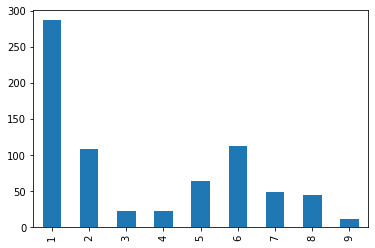

Column: job_conduct_res, 5 unique values
0     17
1     99
2     42
3    381
4    187
Name: job_conduct_res, dtype: int64


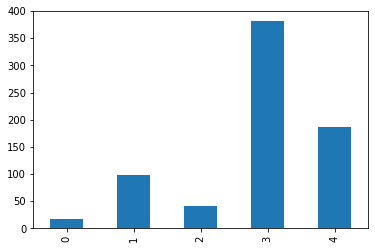

Column: job_analyze_res, 5 unique values
0     10
1     82
2     48
3    407
4    179
Name: job_analyze_res, dtype: int64


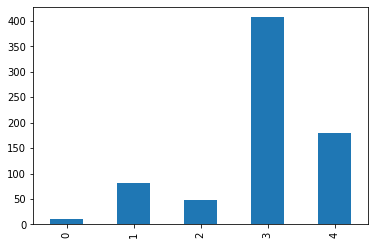

Column: job_buy_res_report, 5 unique values
0    506
1    171
2     32
3     11
4      6
Name: job_buy_res_report, dtype: int64


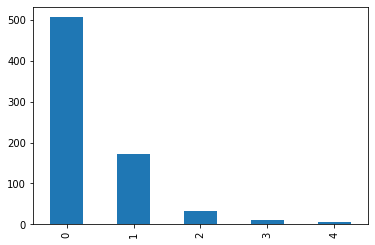

Column: job_manage_res_proj, 5 unique values
0     40
1    123
2     87
3    313
4    163
Name: job_manage_res_proj, dtype: int64


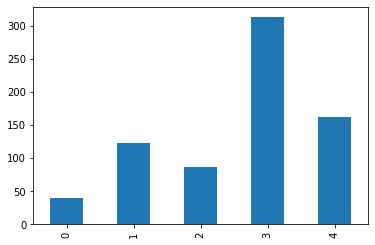

Column: job_observe_res, 5 unique values
0     53
1    257
2    123
3    236
4     57
Name: job_observe_res, dtype: int64


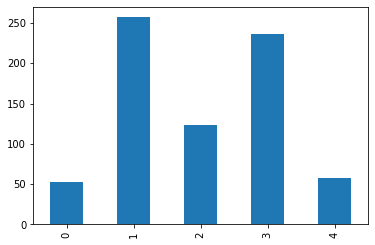

Column: job_plan_res, 5 unique values
0      9
1     79
2     63
3    377
4    198
Name: job_plan_res, dtype: int64


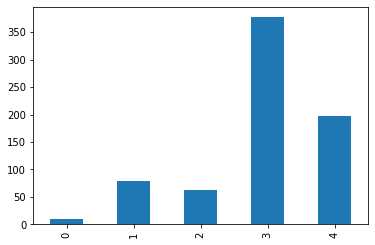

Column: job_teach_res, 5 unique values
0    108
1    237
2     98
3    225
4     58
Name: job_teach_res, dtype: int64


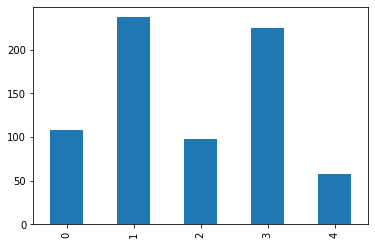

Column: job_advocate_res, 5 unique values
0     22
1     73
2     83
3    308
4    240
Name: job_advocate_res, dtype: int64


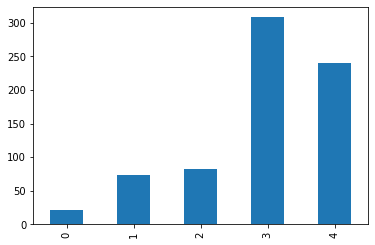

Column: job_hire_res_vendor, 5 unique values
0    329
1    298
2     36
3     58
4      5
Name: job_hire_res_vendor, dtype: int64


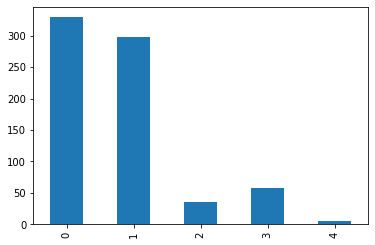

Column: job_lead_res_team, 5 unique values
0    187
1    155
2     99
3    142
4    143
Name: job_lead_res_team, dtype: int64


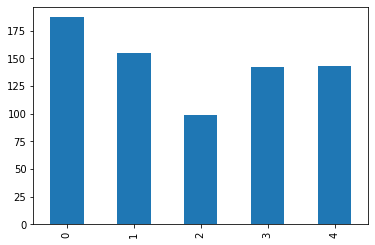

Column: company_small, 2 unique values
0    499
1    227
Name: company_small, dtype: int64


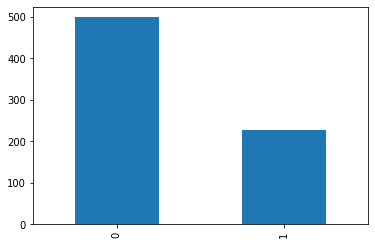

Column: company_med, 2 unique values
0    569
1    157
Name: company_med, dtype: int64


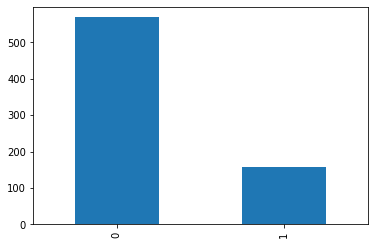

Column: company_large, 2 unique values
0    387
1    339
Name: company_large, dtype: int64


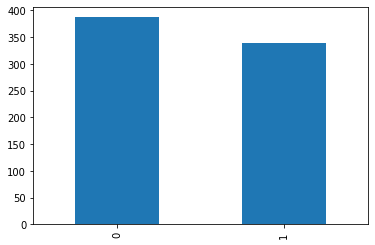

Column: num_res_small, 2 unique values
0    499
1    227
Name: num_res_small, dtype: int64


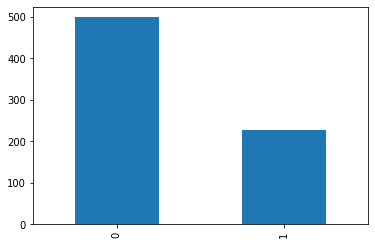

Column: num_res_med, 2 unique values
0    569
1    157
Name: num_res_med, dtype: int64


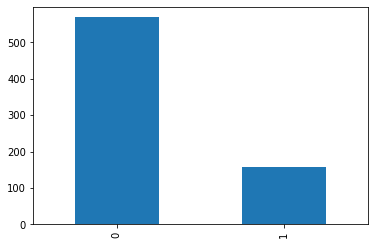

Column: num_res_large, 2 unique values
0    586
1    140
Name: num_res_large, dtype: int64


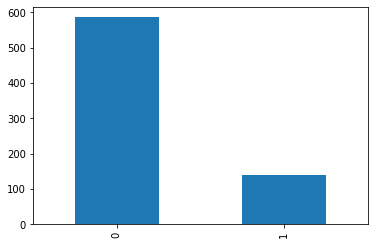

Column: exp_conduct_res, 6 unique values
0     23
1    105
2    126
3    104
4    125
5    243
Name: exp_conduct_res, dtype: int64


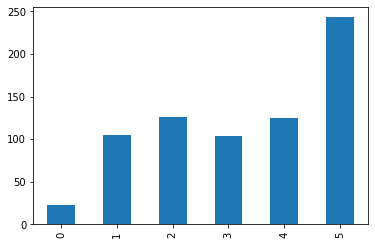

Column: exp_analyze_res, 6 unique values
0     21
1     99
2    123
3    113
4    121
5    249
Name: exp_analyze_res, dtype: int64


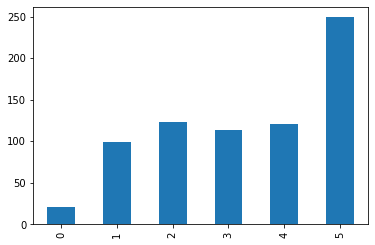

Column: exp_buy_res_report, 6 unique values
0    468
1     91
2     45
3     35
4     24
5     63
Name: exp_buy_res_report, dtype: int64


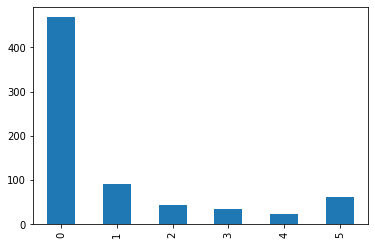

Column: exp_manage_res_proj, 6 unique values
0     76
1    163
2    128
3    103
4     96
5    160
Name: exp_manage_res_proj, dtype: int64


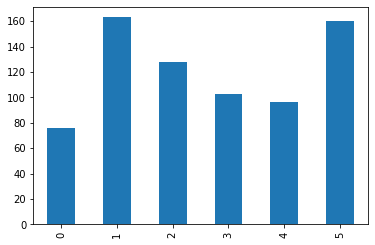

Column: exp_observe_res, 6 unique values
0     50
1    119
2    125
3     89
4    112
5    231
Name: exp_observe_res, dtype: int64


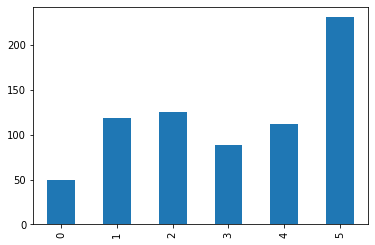

Column: exp_plan_res, 5 unique values
0     29
1    118
2    127
3    118
4    117
5    217
Name: exp_plan_res, dtype: int64


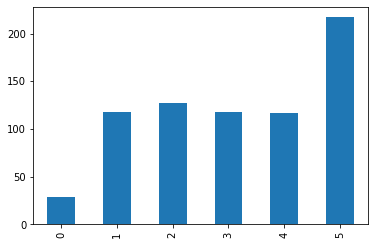

Column: exp_teach_res, 6 unique values
0    197
1    171
2    127
3     87
4     54
5     90
Name: exp_teach_res, dtype: int64


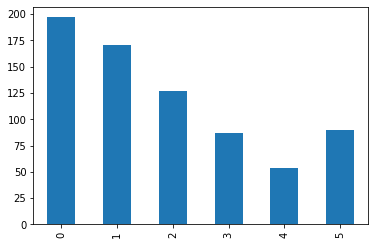

Column: exp_advocate_res, 6 unique values
0     64
1    126
2    132
3    101
4     98
5    205
Name: exp_advocate_res, dtype: int64


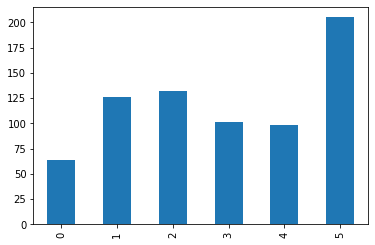

Column: exp_hire_res_vendor, 6 unique values
0    328
1    163
2     84
3     47
4     29
5     75
Name: exp_hire_res_vendor, dtype: int64


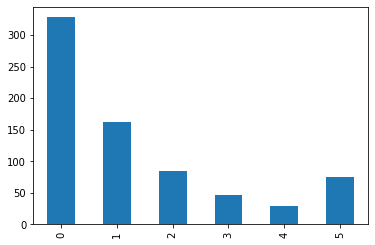

Column: exp_lead_res_team, 6 unique values
0    243
1    183
2    106
3     65
4     50
5     79
Name: exp_lead_res_team, dtype: int64


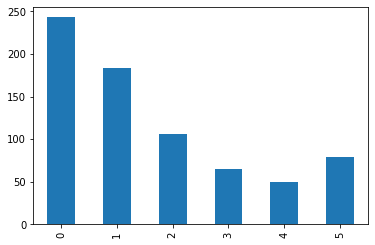

Column: research_educ_cat, 2 unique values
0    180
1    546
Name: research_educ_cat, dtype: int64


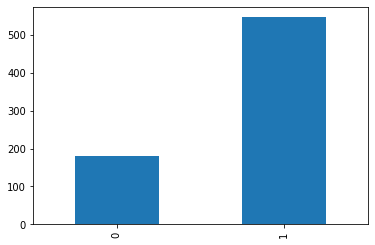

Column: learning_talks, 4 unique values
0     21
1    139
2    331
3    235
Name: learning_talks, dtype: int64


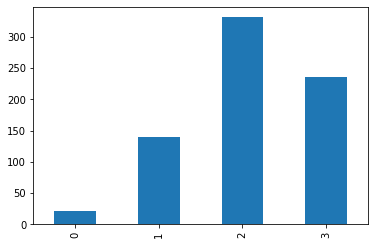

Column: learning_read, 4 unique values
0      2
1     31
2    179
3    514
Name: learning_read, dtype: int64


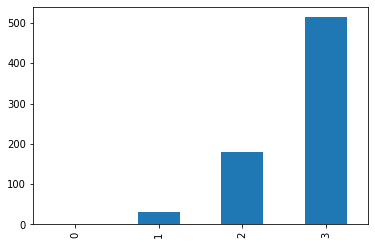

Column: learning_meetup, 4 unique values
0     38
1    226
2    304
3    158
Name: learning_meetup, dtype: int64


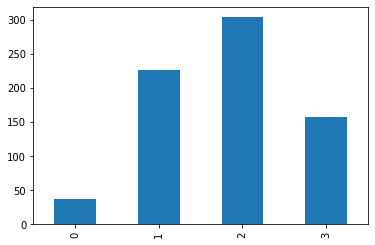

Column: likely_watch_video, 5 unique values
0     15
1     47
2    110
3    318
4    236
Name: likely_watch_video, dtype: int64


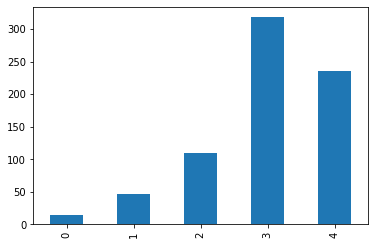

Column: likely_internet, 5 unique values
0      3
1     12
2     39
3    237
4    435
Name: likely_internet, dtype: int64


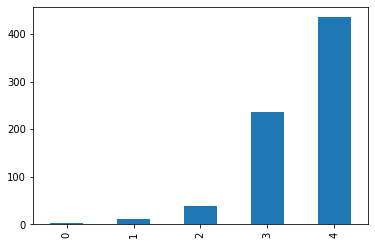

Column: likely_book, 5 unique values
0      4
1     26
2     80
3    281
4    335
Name: likely_book, dtype: int64


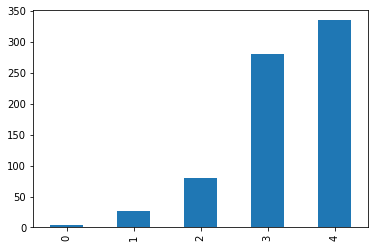

Column: likely_online_group, 5 unique values
0     68
1    191
2    194
3    161
4    112
Name: likely_online_group, dtype: int64


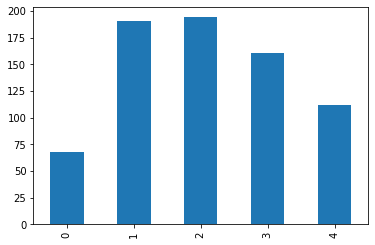

Column: likely_colleague, 5 unique values
0     16
1     41
2    113
3    274
4    282
Name: likely_colleague, dtype: int64


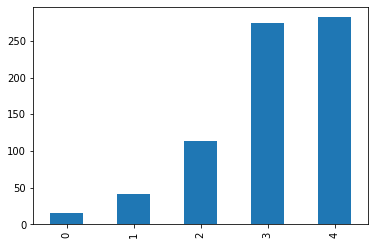

Column: likely_meetup, 5 unique values
0     49
1    168
2    202
3    201
4    106
Name: likely_meetup, dtype: int64


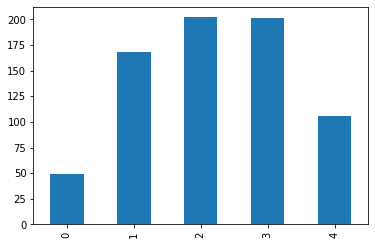

Column: factor_speaker, 5 unique values
0     54
1    170
2    140
3    274
4     88
Name: factor_speaker, dtype: int64


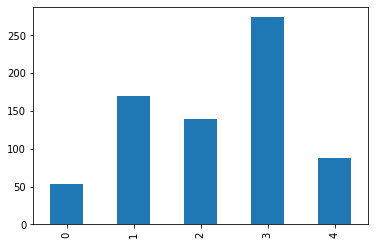

Column: factor_diverse_speak, 5 unique values
0     30
1     61
2    106
3    304
4    225
Name: factor_diverse_speak, dtype: int64


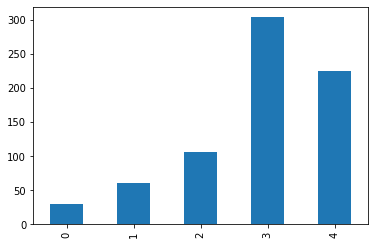

Column: factor_topics, 5 unique values
0      3
1      4
2     14
3    200
4    505
Name: factor_topics, dtype: int64


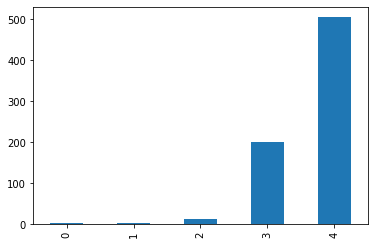

Column: factor_format_sessions, 5 unique values
0     12
1     51
2    185
3    317
4    161
Name: factor_format_sessions, dtype: int64


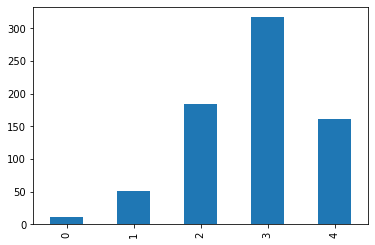

Column: factor_size, 5 unique values
0     56
1    160
2    193
3    210
4    107
Name: factor_size, dtype: int64


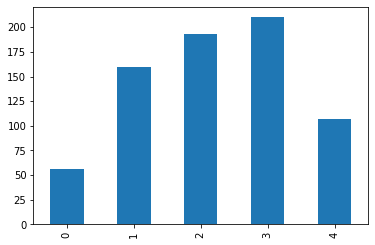

Column: factor_network, 5 unique values
0     80
1    146
2    254
3    187
4     59
Name: factor_network, dtype: int64


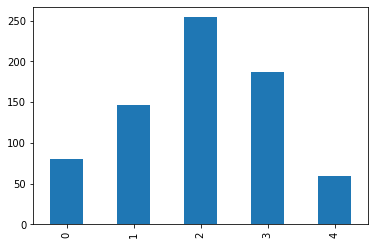

Column: factor_variety_attend, 5 unique values
0     86
1    148
2    221
3    201
4     70
Name: factor_variety_attend, dtype: int64


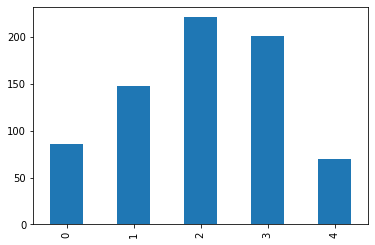

Column: factor_code, 5 unique values
0    135
1    128
2    219
3    160
4     84
Name: factor_code, dtype: int64


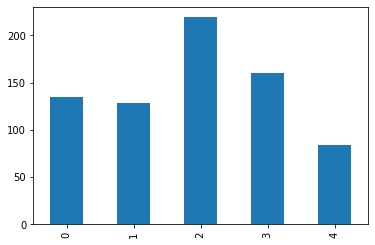

Column: factor_location, 5 unique values
0     17
1     61
2    113
3    289
4    246
Name: factor_location, dtype: int64


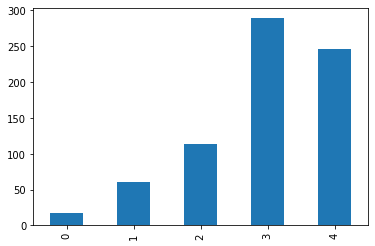

Column: factor_ability_to_pay, 5 unique values
0     17
1     34
2     57
3    198
4    420
Name: factor_ability_to_pay, dtype: int64


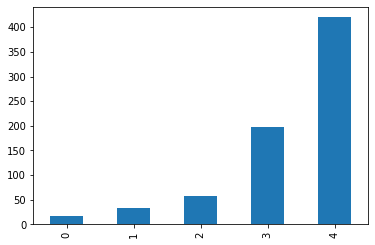

Column: ideal_conference_size_cat, 7 unique values
1.0    190
2.0    260
3.0    179
4.0     46
6.0     31
7.0     17
8.0      3
Name: ideal_conference_size_cat, dtype: int64


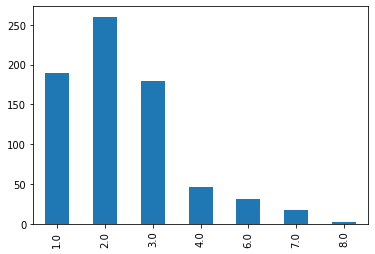

Column: ideal_conf_workshop, 2 unique values
0    536
1    190
Name: ideal_conf_workshop, dtype: int64


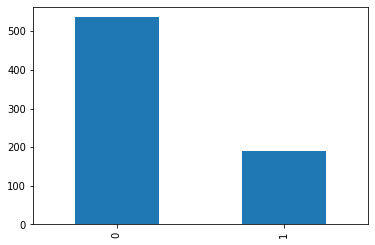

Column: ideal_conf_small, 2 unique values
0    466
1    260
Name: ideal_conf_small, dtype: int64


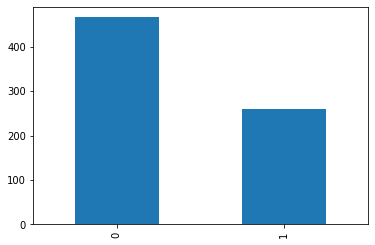

Column: ideal_conf_med, 2 unique values
0    547
1    179
Name: ideal_conf_med, dtype: int64


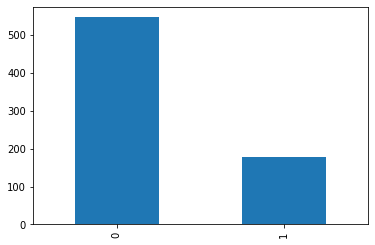

Column: ideal_conf_large, 2 unique values
0    680
1     46
Name: ideal_conf_large, dtype: int64


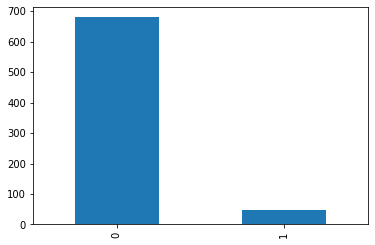

Column: ideal_structure_cat, 5 unique values
1.0    222
2.0    436
3.0     33
4.0     24
5.0     11
Name: ideal_structure_cat, dtype: int64


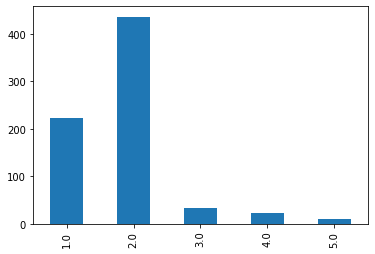

Column: ideal_multi_track, 2 unique values
0    272
1    454
Name: ideal_multi_track, dtype: int64


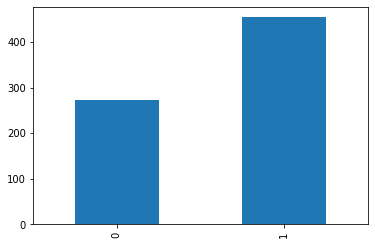

Column: ideal_single_track, 2 unique values
0    483
1    243
Name: ideal_single_track, dtype: int64


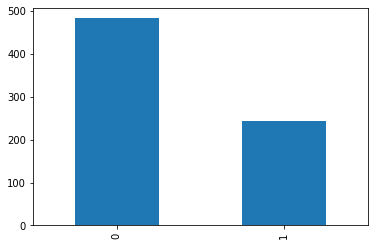

Column: ideal_unconference, 2 unique values
0    681
1     45
Name: ideal_unconference, dtype: int64


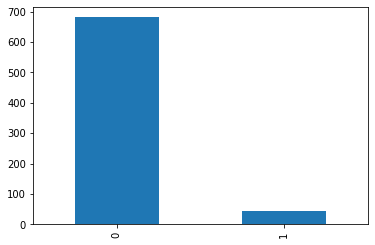

Column: session_keynote, 5 unique values
0     39
1     89
2     95
3    326
4    177
Name: session_keynote, dtype: int64


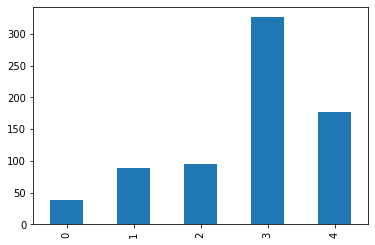

Column: session_long_talk, 5 unique values
0     22
1     67
2    124
3    367
4    146
Name: session_long_talk, dtype: int64


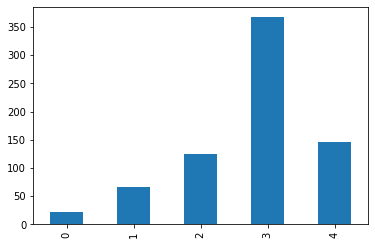

Column: session_short_talk, 5 unique values
0     54
1    115
2    171
3    301
4     85
Name: session_short_talk, dtype: int64


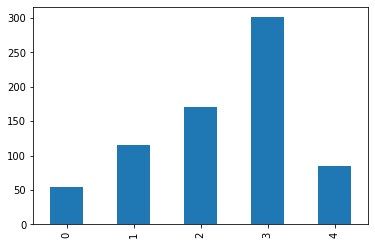

Column: session_workshop, 5 unique values
0     31
1     56
2     96
3    250
4    293
Name: session_workshop, dtype: int64


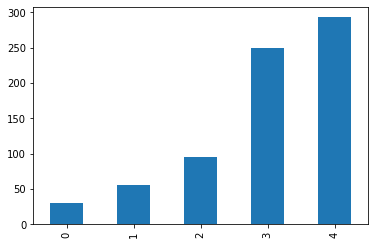

Column: session_network, 5 unique values
0     68
1    167
2    178
3    197
4    116
Name: session_network, dtype: int64


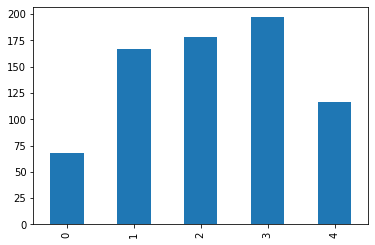

Column: session_social_event, 5 unique values
0    203
1    186
2    170
3    119
4     48
Name: session_social_event, dtype: int64


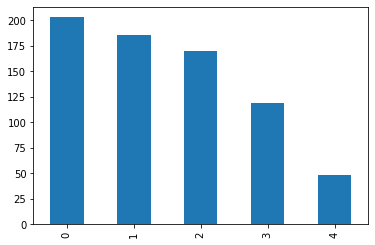

Column: session_qa, 5 unique values
0     75
1    149
2    207
3    203
4     92
Name: session_qa, dtype: int64


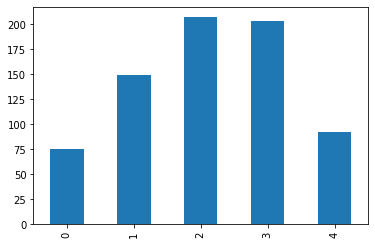

Column: sesson_topic_tables, 5 unique values
0     70
1     98
2    142
3    281
4    135
Name: sesson_topic_tables, dtype: int64


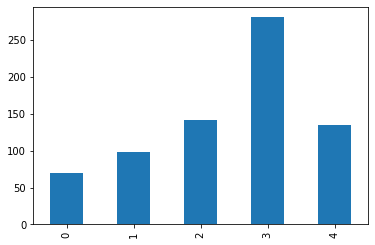

Column: persona_id, 4 unique values
1     94
2    123
3    234
4    181
5     94
Name: persona_id, dtype: int64


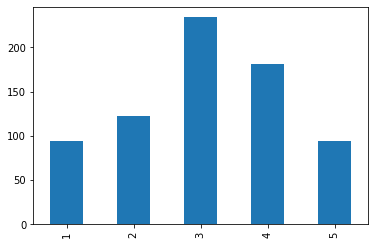

Column: target, 3 unique values
0.0    152
0.5    202
1.0    372
Name: target, dtype: int64


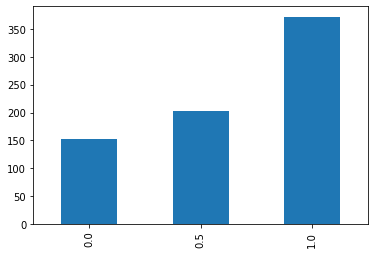

In [24]:
countplot_cols(df, chi2_cols)

## Tricols
[*Back to top*](#Contents)

In [25]:
def countplot_tricols(df0, df1, df2, cols):
    cols0 = df0.columns.to_list()
    cols1 = df1.columns.to_list()
    cols2 = df2.columns.to_list()
    chk_col_list = set(cols0 + cols1 + cols2)
    chk_cols = [col for col in cols if col in chk_col_list]
#     print(chk_col_list)
#     chk_cols1 = [col for col in cols if col in df1.columns]
    for chk_col in chk_cols:
        print(chk_col)
        plot0, plot1, plot2, plot_it = False, False, False, False
        if chk_col in cols0:
            plot_col0 = df0[chk_col].astype('category').value_counts().sort_index()
            x0 = plot_col0.index
            y0 = plot_col0.to_list()
            n0 = len(y0)
            plot0 = True
            plot_it=True
        if chk_col in cols1:
            plot_col1 = df1[chk_col].astype('category').value_counts().sort_index()
            x1 = plot_col1.index
            y1 = plot_col1.to_list()
            n1 = len(y1)
            plot1 = True
            plot_it=True
        if chk_col in cols2:
            plot_col2 = df2[chk_col].astype('category').value_counts().sort_index()
            x2 = plot_col2.index
            y2 = plot_col2.to_list()
            n2 = len(y2)
            plot2 = True
            plot_it=True
        if plot_it:
            fig, axs = plt.subplots(
                nrows=1, 
                ncols=3, 
                figsize=(9,3),
                sharey=True, 
#                 squeeze=False, 
#                 subplot_kw=None, 
#                 gridspec_kw=None,
            )
            fig.suptitle(chk_col)
            if plot0:
                axs[0].bar(x0,y0,align='center',width=.85, tick_label=x0)
            if plot1:
                axs[1].bar(x1,y1,align='center',width=.45, tick_label=x1)
            if plot2:
                axs[2].bar(x2,y2,align='center',width=.45, tick_label=x2)
            plt.show()
        print('*****')

        

job_taxo


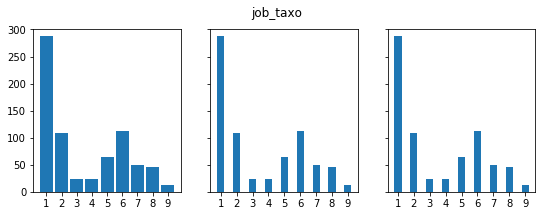

*****
job_conduct_res


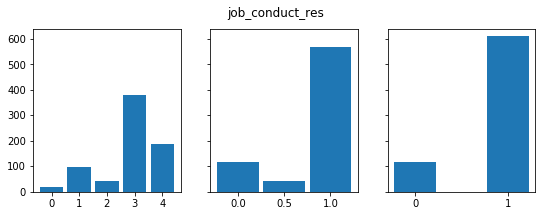

*****
job_analyze_res


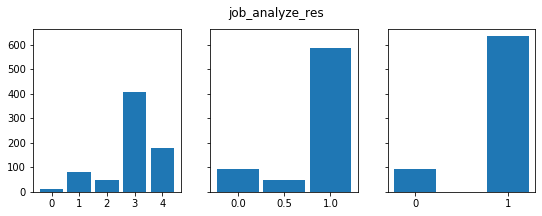

*****
job_buy_res_report


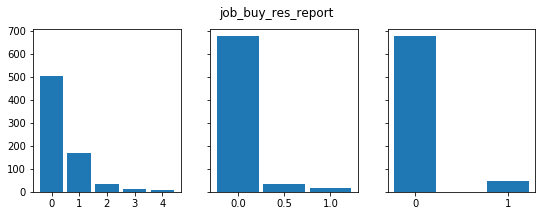

*****
job_manage_res_proj


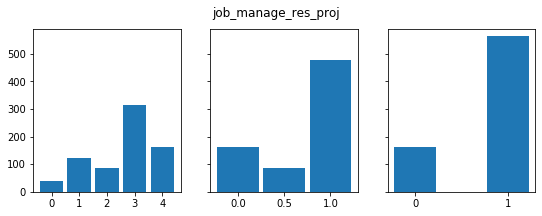

*****
job_observe_res


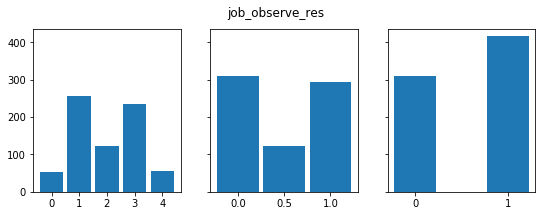

*****
job_plan_res


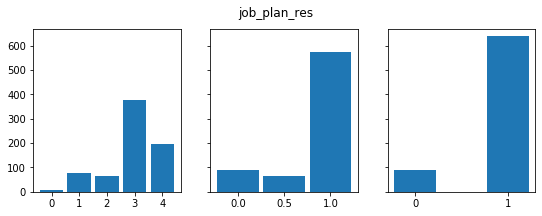

*****
job_teach_res


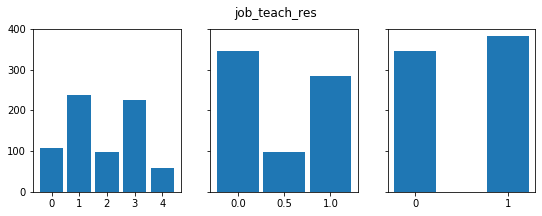

*****
job_advocate_res


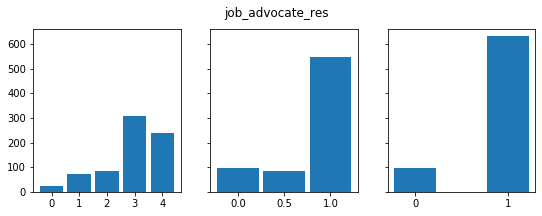

*****
job_hire_res_vendor


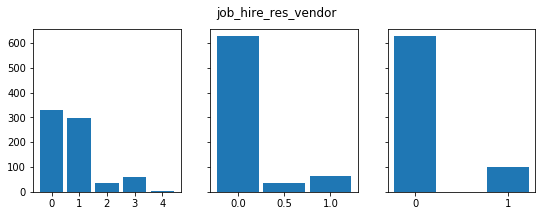

*****
job_lead_res_team


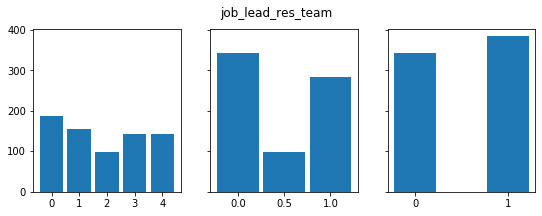

*****
company_small


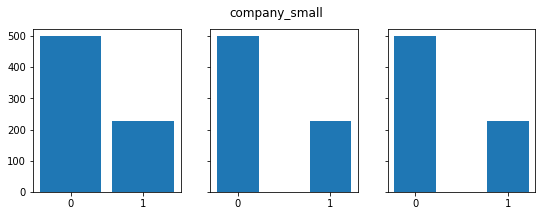

*****
company_med


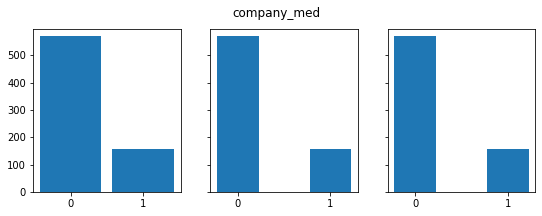

*****
company_large


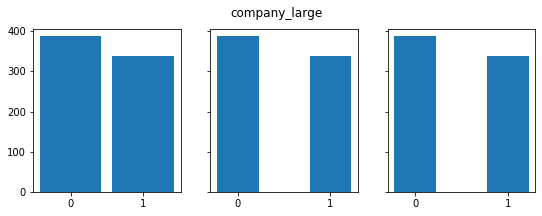

*****
num_res_small


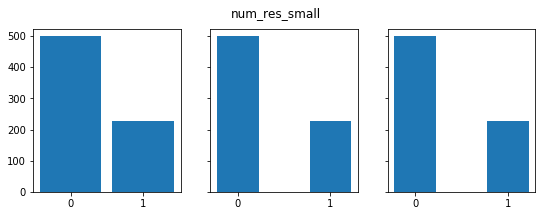

*****
num_res_med


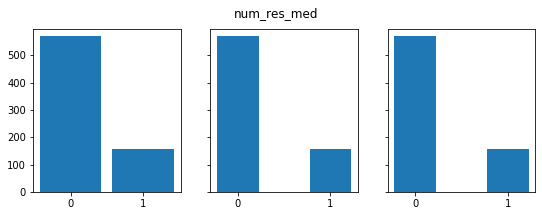

*****
num_res_large


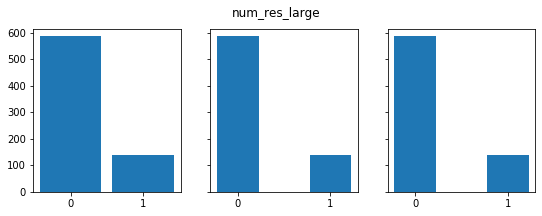

*****
exp_conduct_res


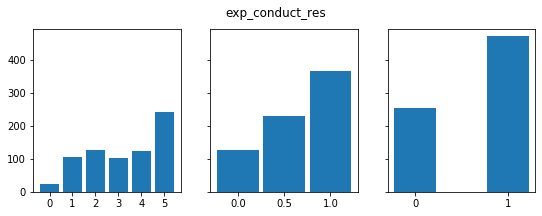

*****
exp_analyze_res


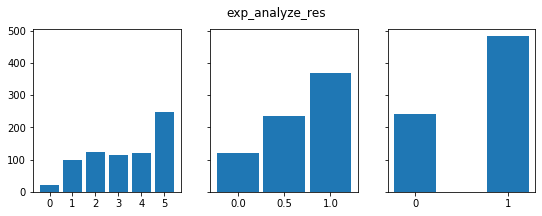

*****
exp_buy_res_report


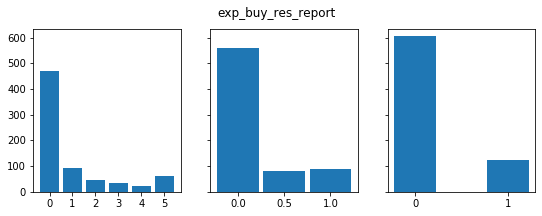

*****
exp_manage_res_proj


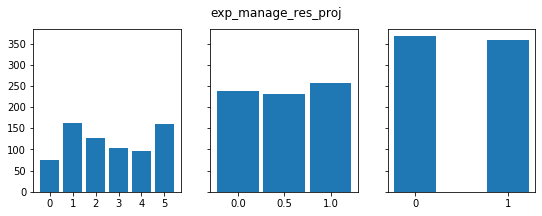

*****
exp_observe_res


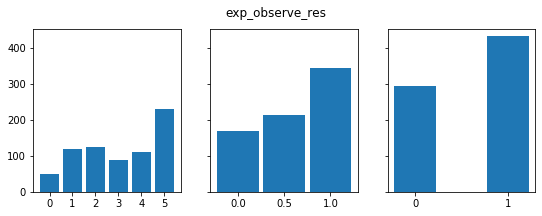

*****
exp_plan_res


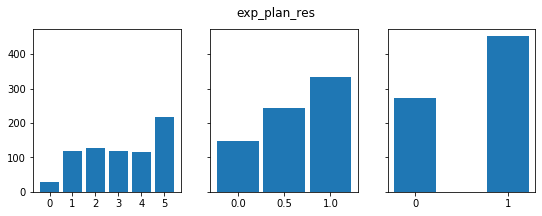

*****
exp_teach_res


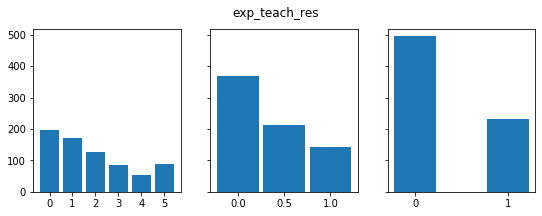

*****
exp_advocate_res


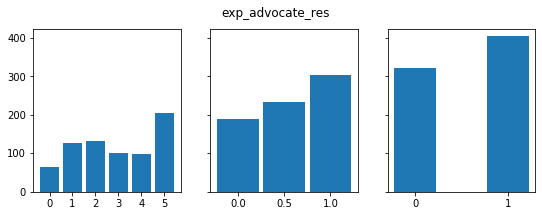

*****
exp_hire_res_vendor


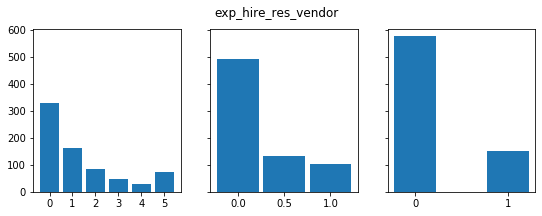

*****
exp_lead_res_team


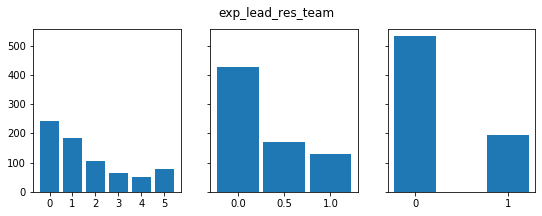

*****
research_educ_cat


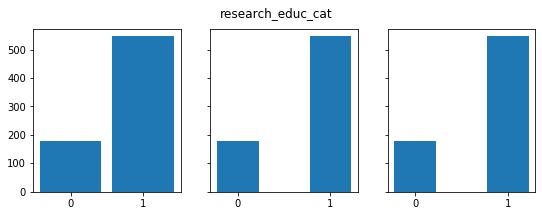

*****
learning_talks


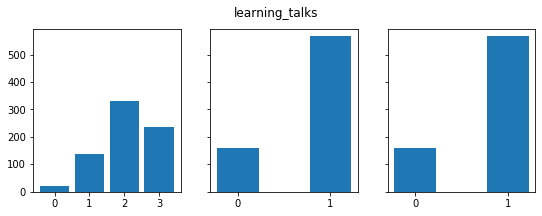

*****
learning_read


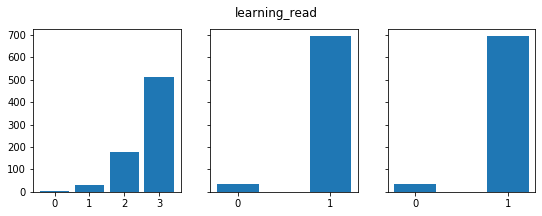

*****
learning_meetup


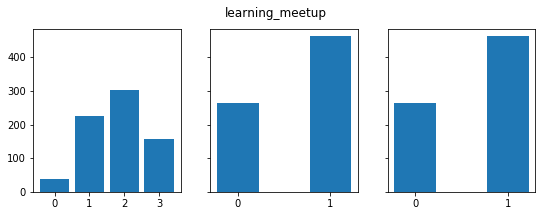

*****
likely_watch_video


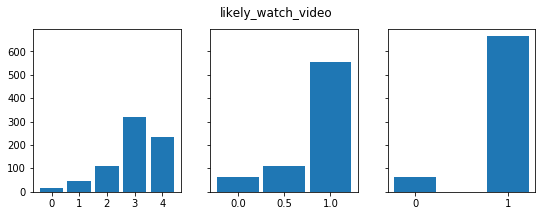

*****
likely_internet


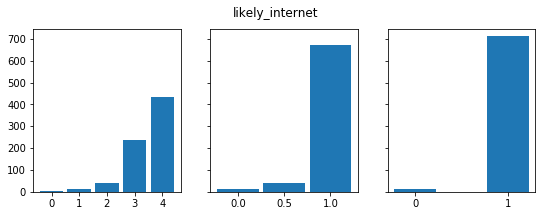

*****
likely_book


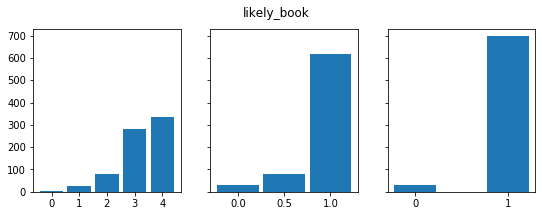

*****
likely_online_group


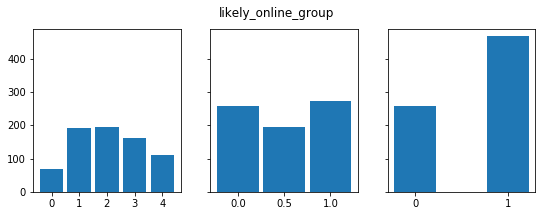

*****
likely_colleague


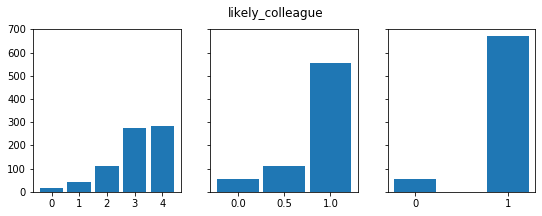

*****
likely_meetup


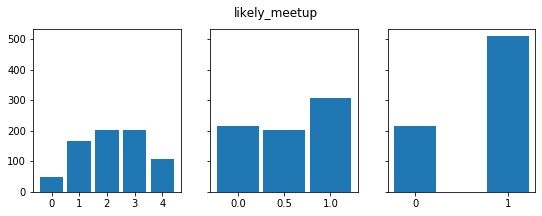

*****
factor_speaker


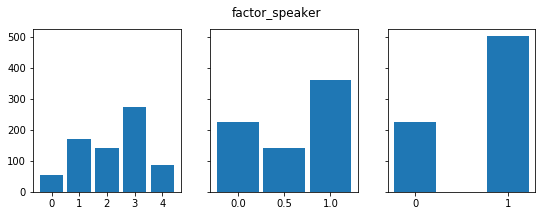

*****
factor_diverse_speak


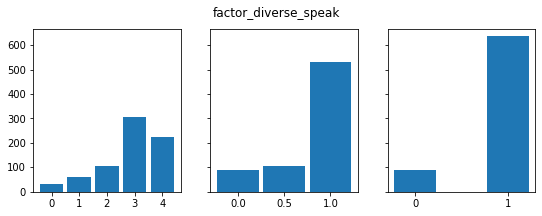

*****
factor_topics


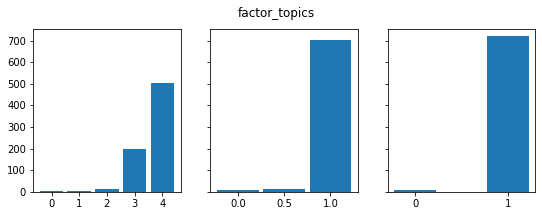

*****
factor_format_sessions


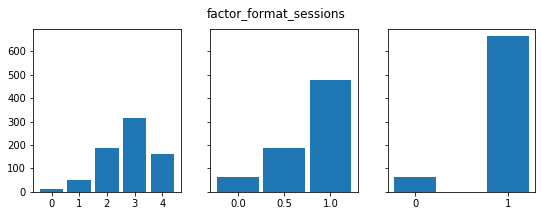

*****
factor_size


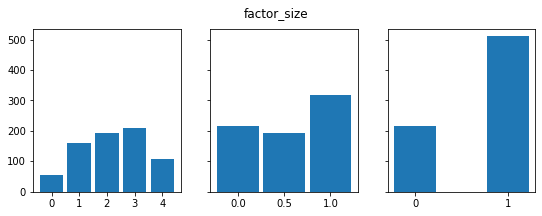

*****
factor_network


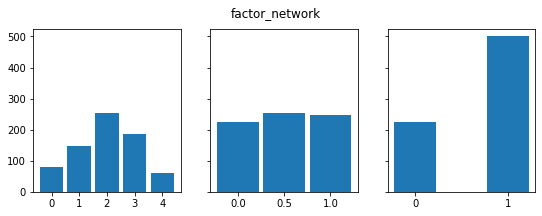

*****
factor_variety_attend


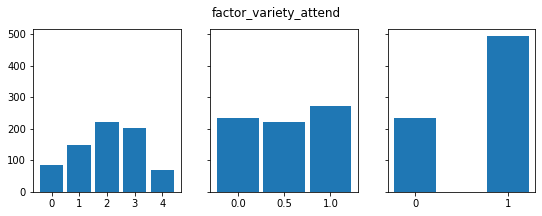

*****
factor_code


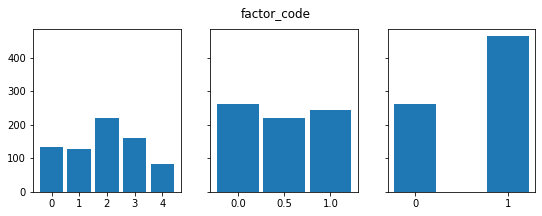

*****
factor_location


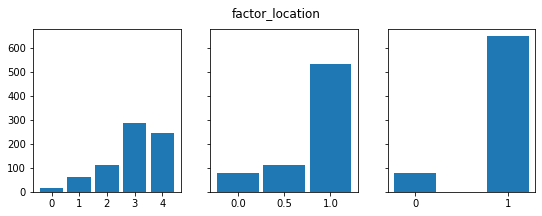

*****
factor_ability_to_pay


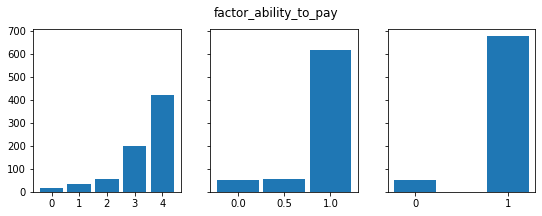

*****
ideal_conference_size_cat


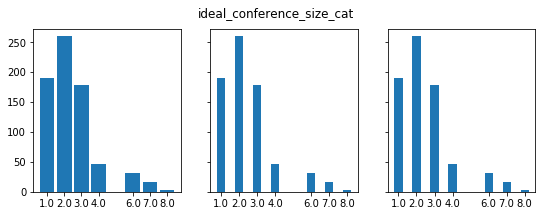

*****
ideal_conf_workshop


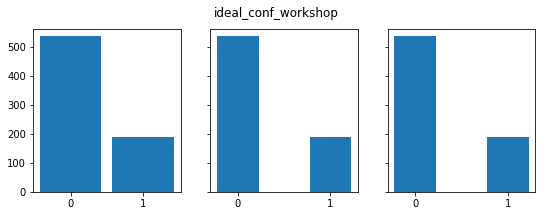

*****
ideal_conf_small


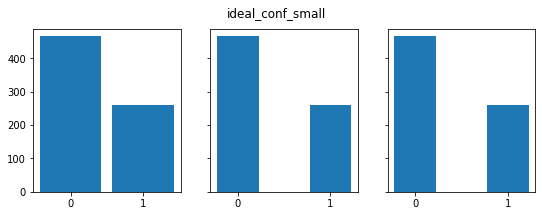

*****
ideal_conf_med


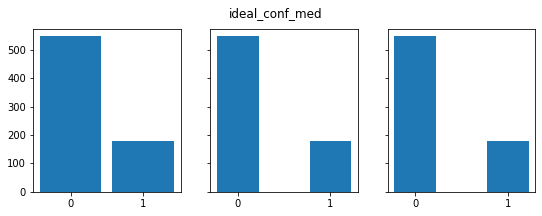

*****
ideal_conf_large


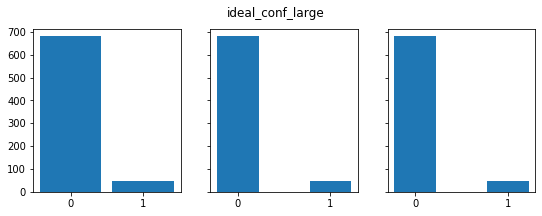

*****
ideal_structure_cat


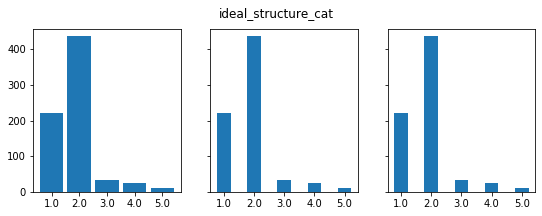

*****
ideal_multi_track


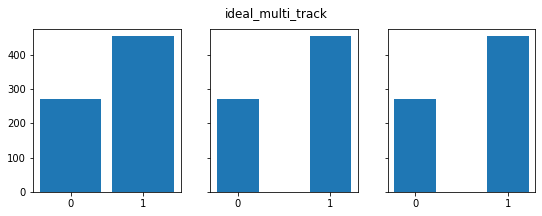

*****
ideal_single_track


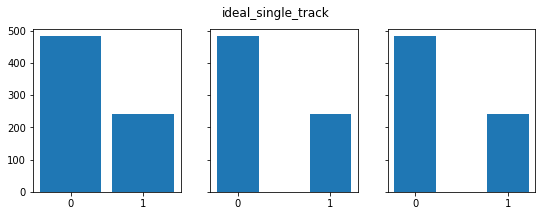

*****
ideal_unconference


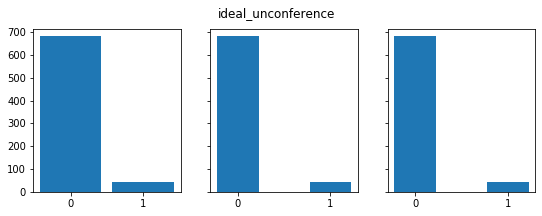

*****
session_keynote


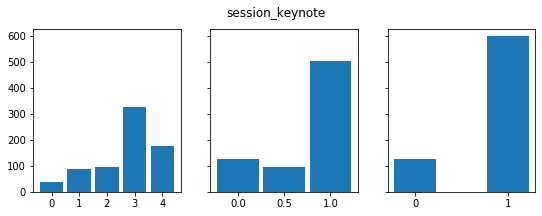

*****
session_long_talk


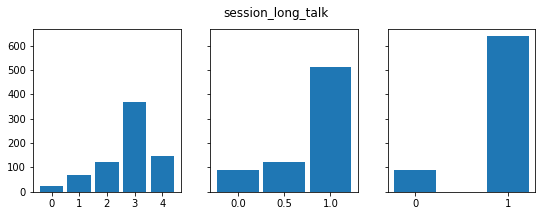

*****
session_short_talk


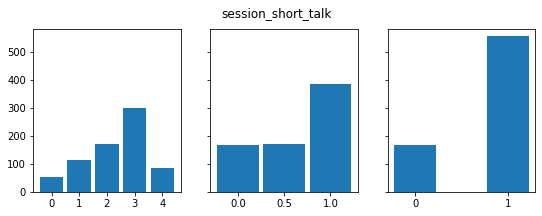

*****
session_workshop


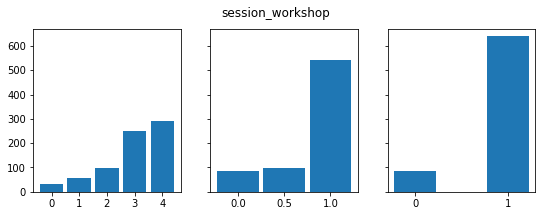

*****
session_network


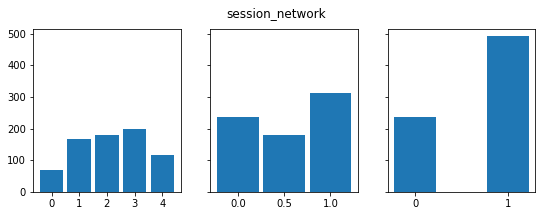

*****
session_social_event


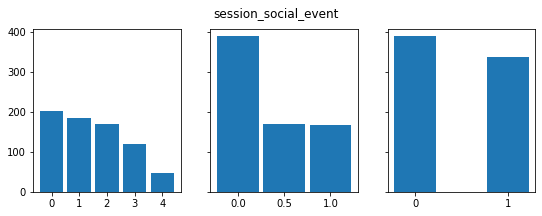

*****
session_qa


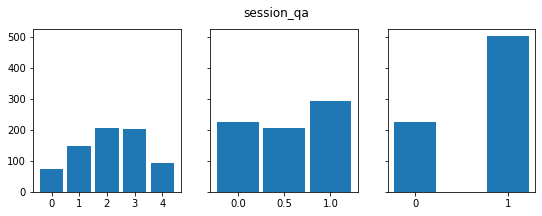

*****
sesson_topic_tables


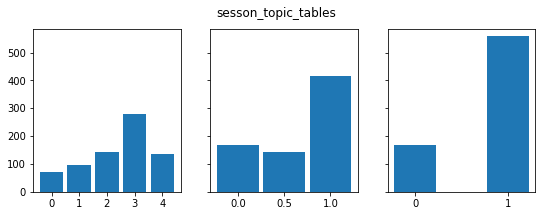

*****
persona_id


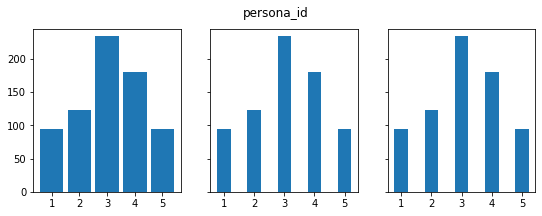

*****
target


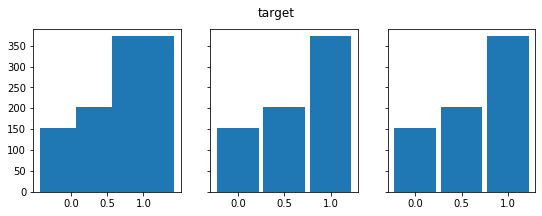

*****


In [26]:
countplot_tricols(df0=df, df1=dfrecode3, df2=dfrecode2, cols=chi2_cols)

In [27]:
def display_cats(col):

    display(df[col].value_counts().sort_index())
    display(dfrecode3[col].value_counts().sort_index())
    display(dfrecode2[col].value_counts().sort_index())

In [28]:
chk_df = dfrecode2
chk_col = 'job_manage_res_proj'
vs_col = 'target'

observed = pd.crosstab(index=chk_df[chk_col], columns=chk_df[vs_col])
observed

target,0.0,0.5,1.0
job_manage_res_proj,,,
0,31,57,75
1,121,145,297


## Chi2
[*Back to top*](#Contents)

In [29]:
def get_chi2_results(
    chk_df, 
    chk_col, 
    vs_col, 
    display_obs=False,
    print_it=False, 
    return_all=False
):
    if print_it:
        print(f'chk_df  = {chk_df.shape}')
        print(f'chk_col = {chk_df[chk_col].name}')
        print(f'vs_col  = {chk_df[vs_col].name}')
    
    observed = pd.crosstab(index=chk_df[chk_col], columns=chk_df[vs_col])
    if display_obs: # Jupyter notebooks only #
        display(observed) # Jupyter notebooks only #
    chi2, p, degf, expected = stats.chi2_contingency(observed)    
    if print_it:
        print('Observed\n')
        print(observed.values)
        print('---\nExpected\n')
        print(expected)
        print('---\n')
        print(f'degf  = {degf:d}')
        print(f'chi^2 = {chi2:.4f}')
        print(f'p     = {p:.4f}')
    if return_all:
        return chi2, p, degf, expected, observed
    else:
        return p

In [30]:
chk_df=dfrecode2
chk_col='job_observe_res'
vs_col='target'

get_chi2_results(
    chk_df=chk_df, 
    chk_col=chk_col, 
    vs_col=vs_col, 
    display_obs=True,
    print_it=True, 
    return_all=False
)


chk_df  = (726, 88)
chk_col = job_observe_res
vs_col  = target


target,0.0,0.5,1.0
job_observe_res,,,
0,77,87,146
1,75,115,226


Observed

[[ 77  87 146]
 [ 75 115 226]]
---
Expected

[[ 64.90358127  86.25344353 158.84297521]
 [ 87.09641873 115.74655647 213.15702479]]
---

degf  = 2
chi^2 = 5.7580
p     = 0.0562


0.05619185140287337

In [31]:
chk_df = dfrecode3
chk_col = 'job_observe_res'
vs_col = 'target'

get_chi2_results(
    chk_df=chk_df, 
    chk_col=chk_col, 
    vs_col=vs_col, 
    display_obs=True,
    print_it=True, 
    return_all=False
)

chk_df  = (726, 88)
chk_col = job_observe_res
vs_col  = target


target,0.0,0.5,1.0
job_observe_res,,,
0.0,77,87,146
0.5,26,33,64
1.0,49,82,162


Observed

[[ 77  87 146]
 [ 26  33  64]
 [ 49  82 162]]
---
Expected

[[ 64.90358127  86.25344353 158.84297521]
 [ 25.75206612  34.2231405   63.02479339]
 [ 61.34435262  81.52341598 150.1322314 ]]
---

degf  = 4
chi^2 = 6.7855
p     = 0.1477


0.14766706366037174

In [32]:
def get_chi2_for_cols(df, cols, target=None, alpha=.05, print_detail=False, print_sum=False):
    chi2_df=pd.DataFrame(columns=['chk_col', 'vs_col', 'p_val'])
    hits, atts = 0, 0    
    chk_cols = [col for col in cols if col in df.columns]
    if target:
        iterlist = [(col, target) for col in chk_cols if col != target]
    else:
        iterlist = it.combinations(chk_cols, 2)
    for chk_col, vs_col in iterlist:
        atts += 1
        pval = get_chi2_results(
            chk_df=df, 
            chk_col=chk_col,
            vs_col=vs_col, 
            display_obs=False,
            print_it=False, 
            return_all=False
        )
        if pval < alpha:
            hits +=1
            if print_detail:
                print(f'Hit {hits} of {atts}:')
                print(f'columns = {chk_col} : {vs_col}')
                print(f'pval    = {pval:.5f}\n')
        chi2_df = chi2_df.append({
            'chk_col': chk_col, 
            'vs_col': vs_col, 
            'p_val': pval}
        , ignore_index=True)
        chi2_df.index.name='index'
    if print_sum:
        print(f'Found {hits} hits out of {atts} columns checked.')
    return chi2_df

In [33]:
chi2_2df = get_chi2_for_cols(dfrecode2, chi2_cols, 'target', print_sum=True)

Found 19 hits out of 65 columns checked.


In [34]:
chi2_2df[chi2_2df.p_val<=5e-02]

,chk_col,vs_col,p_val
index,,,
0,job_taxo,target,1.455262e-04
1,job_conduct_res,target,1.642495e-02
2,job_analyze_res,target,5.173208e-03
7,job_teach_res,target,2.736655e-02
26,exp_lead_res_team,target,4.339279e-03
28,learning_talks,target,4.932926e-02
30,learning_meetup,target,4.428605e-10
33,likely_book,target,3.187749e-02
34,likely_online_group,target,4.377515e-02


In [35]:
chi2_3df = get_chi2_for_cols(dfrecode3, chi2_cols, 'target', print_sum=True)

Found 15 hits out of 65 columns checked.


In [36]:
chi2_3df[chi2_3df.p_val<=.05]

,chk_col,vs_col,p_val
index,,,
0,job_taxo,target,1.455262e-04
1,job_conduct_res,target,1.194133e-02
2,job_analyze_res,target,5.532569e-03
7,job_teach_res,target,2.376957e-02
8,job_advocate_res,target,2.697162e-02
28,learning_talks,target,4.932926e-02
30,learning_meetup,target,4.428605e-10
36,likely_meetup,target,2.240175e-17
38,factor_diverse_speak,target,3.223073e-02


In [37]:
chi2_2dfall = get_chi2_for_cols(dfrecode2, chi2_cols, print_sum=True)

Found 608 hits out of 2145 columns checked.


In [38]:
chi2_2dfall[chi2_2dfall.p_val<=.05]

,chk_col,vs_col,p_val
index,,,
0,job_taxo,job_conduct_res,6.509676e-14
1,job_taxo,job_analyze_res,5.320367e-08
3,job_taxo,job_manage_res_proj,1.329701e-13
5,job_taxo,job_plan_res,1.909792e-10
6,job_taxo,job_teach_res,1.205025e-02
...,...,...,...
2134,session_network,target,1.003555e-03
2135,session_social_event,session_qa,2.344625e-11
2136,session_social_event,sesson_topic_tables,3.453317e-09


In [39]:
chi2_2df.to_csv('chi2_2df.txt')
chi2_3df.to_csv('chi2_3df.txt')
chi2_2dfall.to_csv('chi2_2dfall.txt')

In [40]:
low_p_qs = [
'job_taxo',
'job_conduct_res',
'job_analyze_res',
'job_teach_res',
'exp_lead_res_team',
'persona_id'
]


chk_df=dfrecode2
vs_col='target'

for q in low_p_qs:
    get_chi2_results(
        chk_df=chk_df, 
        chk_col=q, 
        vs_col=vs_col, 
        display_obs=True,
        print_it=True, 
        return_all=False
    )
    print('#####')


chk_df  = (726, 88)
chk_col = job_taxo
vs_col  = target


target,0.0,0.5,1.0
job_taxo,,,
1,76,78,133
2,22,36,51
3,4,6,13
4,1,1,21
5,8,23,34
6,19,41,53
7,9,11,29
8,8,4,33
9,5,2,5


Observed

[[ 76  78 133]
 [ 22  36  51]
 [  4   6  13]
 [  1   1  21]
 [  8  23  34]
 [ 19  41  53]
 [  9  11  29]
 [  8   4  33]
 [  5   2   5]]
---
Expected

[[ 60.08815427  79.85399449 147.05785124]
 [ 22.82093664  30.32782369  55.85123967]
 [  4.815427     6.39944904  11.78512397]
 [  4.815427     6.39944904  11.78512397]
 [ 13.60881543  18.08539945  33.30578512]
 [ 23.6584022   31.44077135  57.90082645]
 [ 10.25895317  13.63360882  25.10743802]
 [  9.4214876   12.52066116  23.05785124]
 [  2.51239669   3.33884298   6.14876033]]
---

degf  = 16
chi^2 = 44.8657
p     = 0.0001
#####
chk_df  = (726, 88)
chk_col = job_conduct_res
vs_col  = target


target,0.0,0.5,1.0
job_conduct_res,,,
0,27,43,46
1,125,159,326


Observed

[[ 27  43  46]
 [125 159 326]]
---
Expected

[[ 24.28650138  32.27548209  59.43801653]
 [127.71349862 169.72451791 312.56198347]]
---

degf  = 2
chi^2 = 8.2179
p     = 0.0164
#####
chk_df  = (726, 88)
chk_col = job_analyze_res
vs_col  = target


target,0.0,0.5,1.0
job_analyze_res,,,
0,23,36,33
1,129,166,339


Observed

[[ 23  36  33]
 [129 166 339]]
---
Expected

[[ 19.26170799  25.59779614  47.14049587]
 [132.73829201 176.40220386 324.85950413]]
---

degf  = 2
chi^2 = 10.5285
p     = 0.0052
#####
chk_df  = (726, 88)
chk_col = job_teach_res
vs_col  = target


target,0.0,0.5,1.0
job_teach_res,,,
0,82,104,159
1,70,98,213


Observed

[[ 82 104 159]
 [ 70  98 213]]
---
Expected

[[ 72.23140496  95.99173554 176.7768595 ]
 [ 79.76859504 106.00826446 195.2231405 ]]
---

degf  = 2
chi^2 = 7.1969
p     = 0.0274
#####
chk_df  = (726, 88)
chk_col = exp_lead_res_team
vs_col  = target


target,0.0,0.5,1.0
exp_lead_res_team,,,
0,125,152,255
1,27,50,117


Observed

[[125 152 255]
 [ 27  50 117]]
---
Expected

[[111.38292011 148.02203857 272.59504132]
 [ 40.61707989  53.97796143  99.40495868]]
---

degf  = 2
chi^2 = 10.8801
p     = 0.0043
#####
chk_df  = (726, 88)
chk_col = persona_id
vs_col  = target


target,0.0,0.5,1.0
persona_id,,,
1,17,15,62
2,18,32,73
3,52,66,116
4,40,54,87
5,25,35,34


Observed

[[ 17  15  62]
 [ 18  32  73]
 [ 52  66 116]
 [ 40  54  87]
 [ 25  35  34]]
---
Expected

[[ 19.68044077  26.15426997  48.16528926]
 [ 25.75206612  34.2231405   63.02479339]
 [ 48.99173554  65.10743802 119.90082645]
 [ 37.8953168   50.36088154  92.74380165]
 [ 19.68044077  26.15426997  48.16528926]]
---

degf  = 8
chi^2 = 22.8078
p     = 0.0036
#####


In [41]:
df.groupby(by=['job_taxo', 'job_title']).target.agg('count')

job_taxo  job_title              
1         Principal UX Researcher     38
          Senior UX Researcher        82
          UX Researcher              167
2         Principal UX Designer       22
          Senior UX Designer          21
          UX Designer                 66
3         Analyst                      5
          Anthropologist               3
          Behavioral economist         1
          Ethnographer                 1
          Market Researcher            3
          Research Scientist           1
          Researcher                   9
4         Academic                    20
          Student                      3
5         Content Strategist           4
          Engineer                    13
          Information Architect       10
          Product Manager              7
          Service Designer            10
          Strategist                  21
6         Design Manager              54
          Research Manager            59
7         Consultant   

In [42]:
target_recode2 = dfrecode2.groupby(['target']).agg('mean').T
target_recode2['all'] = dfrecode2[target_recode2.index].mean()
target_recode2

target,0.0,0.5,1.0,all
job_conduct_res,0.822368,0.787129,0.876344,0.840220
job_analyze_res,0.848684,0.821782,0.911290,0.873278
job_buy_res_report,0.046053,0.084158,0.067204,0.067493
job_manage_res_proj,0.796053,0.717822,0.798387,0.775482
job_observe_res,0.493421,0.569307,0.607527,0.573003
...,...,...,...,...
session_workshop,0.835526,0.866337,0.905914,0.880165
session_network,0.611842,0.608911,0.739247,0.676309
session_social_event,0.394737,0.445545,0.502688,0.464187
session_qa,0.631579,0.702970,0.709677,0.691460


In [119]:
def mean_value_by_field(df, field='persona_id'):
    '''
    mean_value_by_field(df, field='persona_id')

    returns dataframe showing mean values throughout original dataframe when
    controlled for unique values in source field
    '''
    mean_df = df.copy()
    mean_df[field] = mean_df[field].astype('object')
    mean_df = mean_df.groupby([field]).agg('mean').T
    mean_df['all'] = df[mean_df.index].mean()
    return mean_df

In [120]:
persona_recode2 = mean_value_by_field(dfrecode2)
ifull(persona_recode2)

persona_id,1,2,3,4,5,all
job_conduct_res,0.797872,0.837398,0.833333,0.856354,0.872340,0.840220
job_analyze_res,0.840426,0.845528,0.880342,0.900552,0.872340,0.873278
job_buy_res_report,0.095745,0.089431,0.055556,0.049724,0.074468,0.067493
job_manage_res_proj,0.755319,0.699187,0.876068,0.790055,0.617021,0.775482
job_observe_res,0.595745,0.593496,0.551282,0.596685,0.531915,0.573003
job_plan_res,0.851064,0.878049,0.918803,0.878453,0.808511,0.878788
job_teach_res,0.563830,0.487805,0.606838,0.513812,0.351064,0.524793
job_advocate_res,0.861702,0.845528,0.905983,0.883978,0.787234,0.869146
job_hire_res_vendor,0.223404,0.089431,0.166667,0.110497,0.085106,0.136364
job_lead_res_team,0.585106,0.528455,0.658120,0.436464,0.329787,0.528926


<function matplotlib.pyplot.show(*args, **kw)>

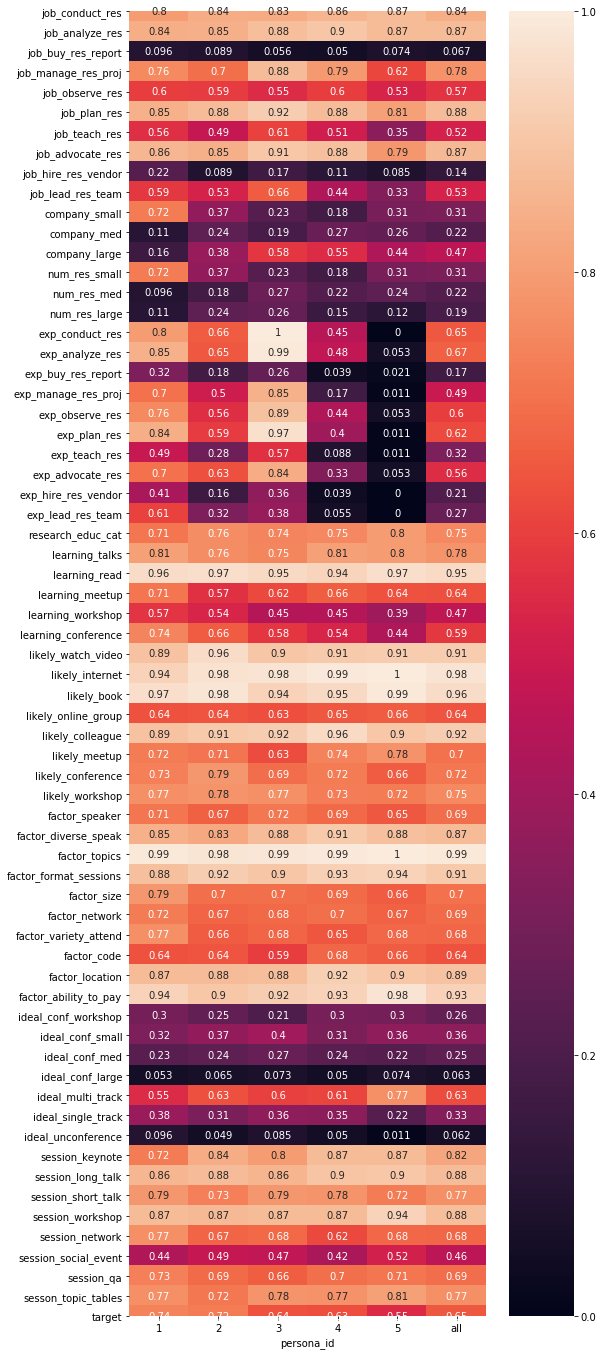

In [121]:
plt.figure(figsize=(8,24))
sns.heatmap(persona_recode2, annot=True)
plt.show

In [124]:
persona_recodeagg = dfrecode2.copy()
persona_recodeagg.persona_id = persona_recodeagg.persona_id.astype('object')
persona_recodeagg = persona_recodeagg.groupby(['persona_id']).agg(['sum','count','mean']).T
persona_recodeagg['idx'] = persona_recodeagg.index

idx = persona_recodeagg.idx.apply(pd.Series)
persona_recodeagg.drop(columns=['idx'], inplace=True)
idx.columns = ['field', 'statistic']
# ifull(idx)
persona_recodeagg = persona_recodeagg.join(idx)


# idx=idx.idx.apply(pd.Series)
# idxdf = idx.str.extract(r'\((\w*), (\w*)\)')
# print(type(idxdf))
# idxdf.columns=(['field','stat'])
# idxdf['idx']=idx
# idx2[['field', 'stat']] = pd.DataFrame(idx['idx'].tolist(), index=df.index)
# persona_recode2['all'] = persona_recode2[persona_recode2.index].agg(['sum','count','mean'])
ifull(persona_recodeagg)

# ifull(persona_recode2.columns)
# persona_recode2.index

1           2           3           4  \
job_conduct_res        sum    75.000000  103.000000  195.000000  155.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.797872    0.837398    0.833333    0.856354   
job_analyze_res        sum    79.000000  104.000000  206.000000  163.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.840426    0.845528    0.880342    0.900552   
job_buy_res_report     sum     9.000000   11.000000   13.000000    9.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.095745    0.089431    0.055556    0.049724   
job_manage_res_proj    sum    71.000000   86.000000  205.000000  143.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.755319    0.699187    0.876068    0.790055   
job_observe_res        sum    56.000000   73.000000  129.000000  108.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.595745    0.593496    0.551282    0.596685   
job_plan_res           sum    80.000000  108.000000  215.000000  159.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.851064    0.878049    0.918803    0.878453   
job_teach_res          sum    53.000000   60.000000  142.000000   93.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.563830    0.487805    0.606838    0.513812   
job_advocate_res       sum    81.000000  104.000000  212.000000  160.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.861702    0.845528    0.905983    0.883978   
job_hire_res_vendor    sum    21.000000   11.000000   39.000000   20.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.223404    0.089431    0.166667    0.110497   
job_lead_res_team      sum    55.000000   65.000000  154.000000   79.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.585106    0.528455    0.658120    0.436464   
company_small          sum    68.000000   45.000000   53.000000   32.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.723404    0.365854    0.226496    0.176796   
company_med            sum    10.000000   30.000000   44.000000   49.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.106383    0.243902    0.188034    0.270718   
company_large          sum    15.000000   47.000000  136.000000  100.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.159574    0.382114    0.581197    0.552486   
num_res_small          sum    68.000000   45.000000   53.000000   32.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.723404    0.365854    0.226496    0.176796   
num_res_med            sum     9.000000   22.000000   64.000000   39.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.095745    0.178862    0.273504    0.215470   
num_res_large          sum    10.000000   30.000000   61.000000   28.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.106383    0.243902    0.260684    0.154696   
exp_conduct_res        sum    75.000000   81.000000  234.000000   82.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
         

In [102]:
personatarget_recode2 = dfrecode2.groupby(['persona_id','target']).agg('mean')
# personatarget_recode2['mean'] = dfrecode2[target_recode2.index].mean()
ifull(personatarget_recode2)

job_conduct_res  job_analyze_res  job_buy_res_report  \
persona_id target                                                         
1          0.0            0.764706         0.764706            0.058824   
           0.5            0.800000         0.866667            0.066667   
           1.0            0.806452         0.854839            0.112903   
2          0.0            0.722222         0.722222            0.055556   
           0.5            0.750000         0.781250            0.125000   
           1.0            0.904110         0.904110            0.082192   
3          0.0            0.826923         0.826923            0.076923   
           0.5            0.727273         0.818182            0.106061   
           1.0            0.896552         0.939655            0.017241   
4          0.0            0.875000         0.925000            0.025000   
           0.5            0.833333         0.870370            0.055556   
           1.0            0.862069         0.908046            0.057471   
5          0.0            0.840000         0.920000            0.000000   
           0.5            0.857143         0.771429            0.057143   
           1.0            0.911765         0.941176            0.147059   

                   job_manage_res_proj  job_observe_res  job_plan_res  \
persona_id target                                                       
1          0.0                0.764706         0.588235      0.823529   
           0.5                0.733333         0.400000      0.933333   
           1.0                0.758065         0.645161      0.838710   
2          0.0                0.611111         0.666667      0.833333   
           0.5                0.531250         0.531250      0.812500   
           1.0                0.794521         0.602740      0.917808   
3          0.0                0.884615         0.442308      0.923077   
           0.5                0.878788         0.590909      0.893939   
           1.0                0.870690         0.577586      0.931034   
4          0.0                0.850000         0.500000      0.875000   
           0.5                0.740741         0.592593      0.833333   
           1.0                0.793103         0.643678      0.908046   
5          0.0                0.680000         0.400000      0.720000   
           0.5                0.542857         0.600000      0.828571   
           1.0                0.647059         0.558824      0.852941   

                   job_teach_res  job_advocate_res  job_hire_res_vendor  \
persona_id target                                                         
1          0.0          0.470588          0.882353             0.176471   
           0.5          0.600000          0.866667             0.200000   
           1.0          0.580645          0.854839             0.241935   
2          0.0          0.388889          0.944444             0.111111   
           0.5          0.468750          0.843750             0.125000   
           1.0          0.520548          0.821918             0.068493   
3          0.0          0.519231          0.865385             0.153846   
           0.5          0.606061          0.924242             0.227273   
           1.0          0.646552          0.913793             0.137931   
4          0.0          0.500000          0.800000             0.050000   
           0.5          0.444444          0.925926             0.129630   
           1.0          0.563218          0.896552             0.126437   
5          0.0          0.320000          0.760000             0.040000   
           0.5          0.285714          0.857143             0.114286   
           1.0          0.441176          0.735294             0.088235   

                   job_lead_res_team  company_small  company_med  \
persona_id target                                                  
1          0.0              0.705882       0.705882     0.235294   
           0.5       

In [47]:
target_recode2.columns.to_list()

[0.0, 0.5, 1.0, 'all']

In [48]:
df.num_employees.isin([0,1])

resp_id
284     True
288    False
294    False
281    False
280    False
       ...  
869    False
879    False
136    False
74     False
2      False
Name: num_employees, Length: 726, dtype: bool